In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.cpm_basic import CellularPottsModel
from scipy.spatial import ConvexHull
import matplotlib.cm as cm
import pickle
from skimage.measure import regionprops, label, perimeter as measure_perimeter
from scipy.ndimage import label as label_scipy
import pandas as pd
from src.util import color_code_cells

In [2]:
n_cells=65
n_types=2 
T=26 
L=150
J = 100
adhessions= np.array([[0, 0.2, 0.2],  
                      [0.2, J, J],
                      [0.2, J, J]]) 
volume_coefficient= np.array([0, 10, 20])
perimeter_coefficient= np.array([0, 1, 1])
lattice_type="prerun"
object_volumes=None # Is default set in the CPM class if none
periodic=False

# Time Development

In [ ]:
EN = []
init = ["circle", "hex","prerun"]
for i in range(len(init)):
    if init[i] == "circle":
        lattice_type = "circle"
    else:
        lattice_type = "hex"
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=volume_coefficient, perimeter_coefficient=perimeter_coefficient,
                             adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
    energy = cpm.run_time_development_sim(steps=1000000, interval=1000)
    EN.append(energy)

100%|██████████| 1000000/1000000 [05:59<00:00, 2783.37it/s]


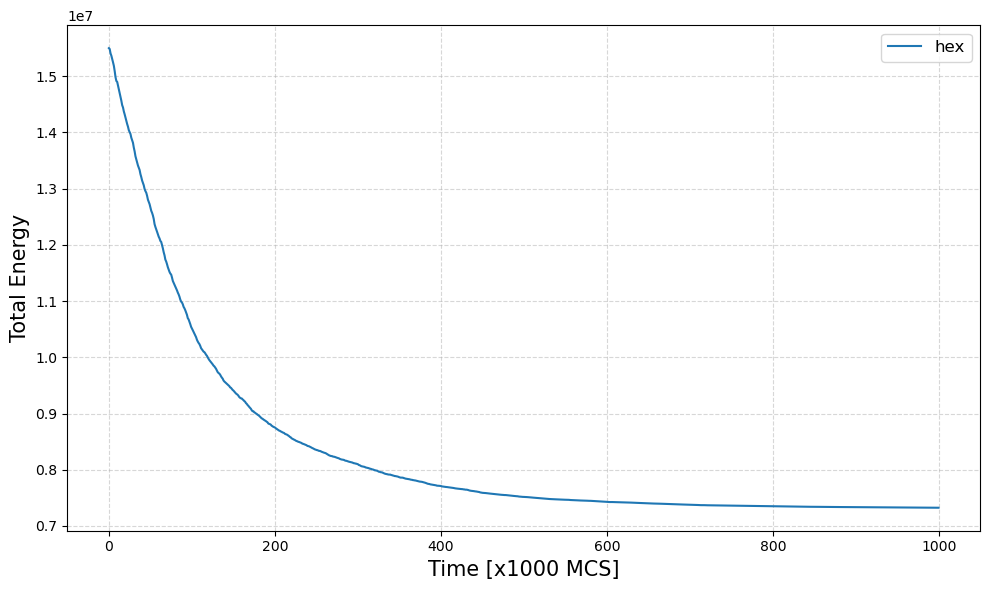

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
for i, energy in enumerate(EN):
    if i==0:
        pass
    else:
        ax.plot(energy, label=init[i])
        ax.set_xlabel("Time [x1000 MCS]", fontsize=15)
        ax.set_ylabel("Total Energy", fontsize=15)
        ax.legend(fontsize=12)
        ax.grid(linestyle='--', alpha=0.5)
fig.tight_layout()

# Adhesion Between Two Cells

In [ ]:
n_cells=65
n_types=2 
T=300
L=150
 
medium_adhesion = 180
J = 2*medium_adhesion 
adhessions= np.array([[0, medium_adhesion, medium_adhesion],  
                      [medium_adhesion, J, J],
                      [medium_adhesion, J, J]]) 
volume_coefficient= np.array([0, 1, 1])
perimeter_coefficient= 0 # np.array([0, 0.1, 0.1])
lattice_type="two_cells"
object_volumes=None # Is default set in the CPM class if none
periodic=False


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=volume_coefficient, perimeter_coefficient=perimeter_coefficient,
                         adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
cpm.save_animation_gif(steps_per_frame=5000, frames=120, output_file="two_cells_adhesion.gif")

100%|██████████| 900000/900000 [00:09<00:00, 93611.11it/s]


# Two Cell Exploration

In [16]:
# Set up the Constants and Parameters
J = 100

strong_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, 500, 50],
                                        [0.2, 50, 500]]) 
weak_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                          [0.2, 50, 500],
                                          [0.2, 500, 50]])

same_adhesion_between_types = np.array([[0, 0.2, 0.2],  
                                        [0.2, J, J],
                                        [0.2, J, J]])
five_volume_coefficient = np.array([0, 1, 5])
ten_volume_coefficient = np.array([0, 1, 10])
same_volume_coefficient = np.array([0, 1, 1])

five_perimeter_coefficient = np.array([0, 1, 5])
ten_perimeter_coefficient = np.array([0, 1, 10])
same_perimeter_coefficient = np.array([0, 1,  1])


adhesion_params = [strong_adhesion_between_types, weak_adhesion_between_types, same_adhesion_between_types]
adhesion_param_names = ['Strong Adhesion Between Types', 'Weak Adhesion Between Types', 'Same Adhesion Between Types']
volume_params = [five_volume_coefficient, ten_volume_coefficient, same_volume_coefficient]
volume_param_names = ['Five times Volume Coeff for type 2', 'Ten times Volume Coeff for type 2', 'Same Volume Coeff']
perimeter_params = [five_perimeter_coefficient, ten_perimeter_coefficient, same_perimeter_coefficient]
perimeter_param_names = ['Five times Perimeter Coeff for type 2', 'Ten times Perimeter Coeff for type 2', 'Same Perimeter Coeff']

## Strong and Weak Adhesion

In [17]:
# Strong and Weak Adhesion Between Types
adhesions = [strong_adhesion_between_types, weak_adhesion_between_types]
grid_results_ad = []
type_results_ad = []
for i, adhesion in enumerate(adhesions):
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=same_volume_coefficient,
                                perimeter_coefficient=same_perimeter_coefficient, adhessions=adhesion,
                                lattice_type="hex", object_volumes=object_volumes, periodic=periodic)
    grid = cpm.run_a_sim(steps=600000)
    grid_results_ad.append(grid)
    type_results_ad.append(cpm.tau)


  0%|          | 0/600000 [00:00<?, ?it/s]

100%|██████████| 600000/600000 [01:26<00:00, 6952.44it/s]


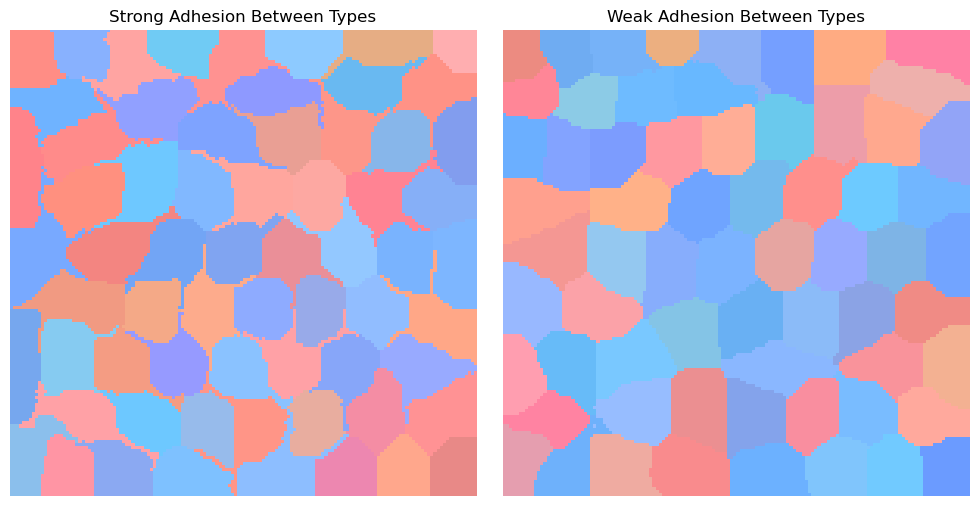

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
labels = ['Strong Adhesion Between Types', 'Weak Adhesion Between Types']
for i, ax in enumerate(axes):
    colored_grid = color_code_cells(grid_results_ad[i], type_results_ad[i])
    ax.imshow(colored_grid)
    ax.set_title(labels[i])
    ax.axis('off')
fig.tight_layout()
fig.savefig('adhesion_comparison.png', dpi=300)

## Testing Strong Adhesion Between Types

If we use strong adhesion, but let one of the cell types have a high $\lambda$ and high $\beta$ then only one of the cells types should be "gooey". 


Theoretically, so the same result as above but only blue is gooey.

Used cell type 2 has 5 and 10 times the coefficient of cell type 1, for volume and perimeter.

In [19]:
vol_and_perim_params = [(five_volume_coefficient, five_perimeter_coefficient), (ten_volume_coefficient, ten_perimeter_coefficient)]
grid_results_vp = []
type_results_vp = []

for i, (vol_coeff, perim_coeff) in enumerate(vol_and_perim_params):
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=vol_coeff,
                                perimeter_coefficient=perim_coeff, adhessions=strong_adhesion_between_types,
                                lattice_type="hex", object_volumes=object_volumes, periodic=periodic)
    grid = cpm.run_a_sim(steps=600000)
    grid_results_vp.append(grid)
    type_results_vp.append(cpm.tau)

100%|██████████| 600000/600000 [01:38<00:00, 6115.18it/s]


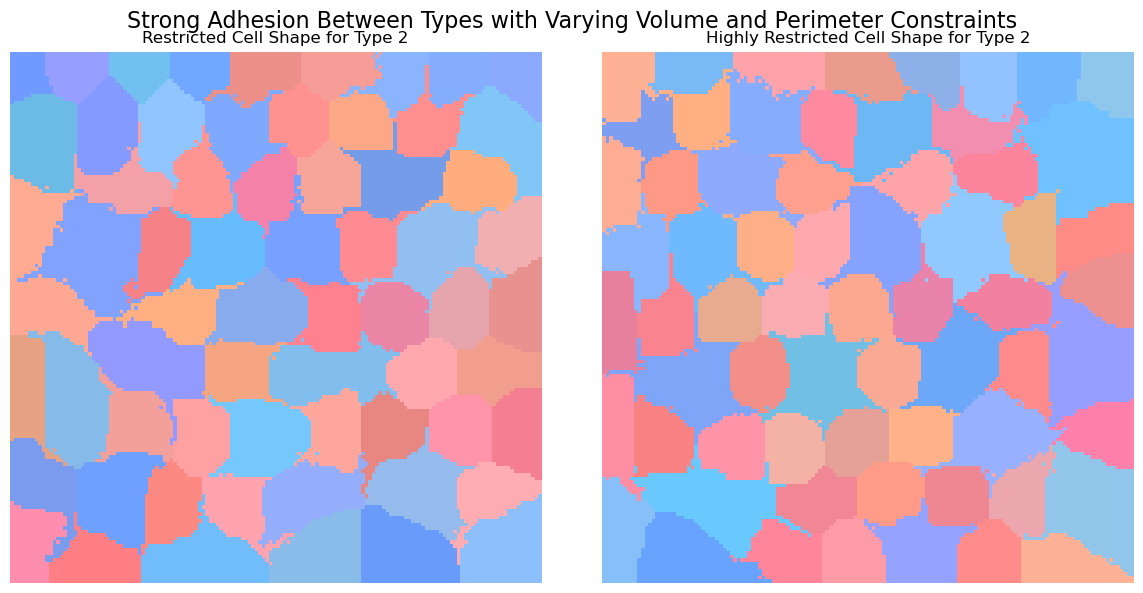

In [20]:
labels_vp = ["Restricted Cell Shape for Type 2", "Highly Restricted Cell Shape for Type 2"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(2):
    colored_grid = color_code_cells(grid_results_vp[i], type_results_vp[i])
    ax[i].imshow(colored_grid)
    ax[i].set_title(labels_vp[i])
    ax[i].axis('off')
fig.suptitle("Strong Adhesion Between Types with Varying Volume and Perimeter Constraints", fontsize=16)
fig.tight_layout()

## Testing Weak Adhesion Between Types

If we use weak adhesion between the two types, but let one of the cell types have a high $\lambda$ and high $\beta$ then only one of the cells types should be "gooey". 

Theoretically blue should still have more varity in shape

In [23]:
grid_results_vp_w = []
type_results_vp_w = []

for i, (vol_coeff, perim_coeff) in enumerate(vol_and_perim_params):
    cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=vol_coeff,
                                perimeter_coefficient=perim_coeff, adhessions=weak_adhesion_between_types,
                                lattice_type="hex", object_volumes=object_volumes, periodic=periodic)
    grid = cpm.run_a_sim(steps=600000)
    grid_results_vp_w.append(grid)
    type_results_vp_w.append(cpm.tau)

100%|██████████| 600000/600000 [01:32<00:00, 6503.27it/s]


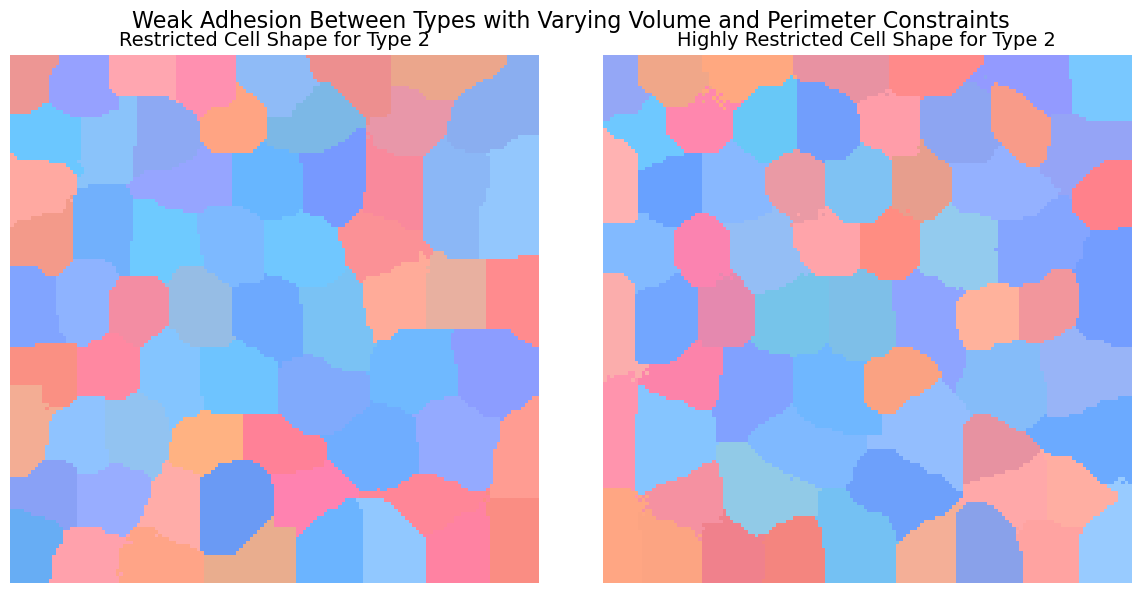

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in enumerate(axes):
    im = ax.imshow(color_code_cells(grid_results_vp_w[i], type_results_vp_w[i]), cmap='tab20')
    ax.set_title(labels_vp[i], fontsize=14)
    ax.axis('off')
fig.suptitle("Weak Adhesion Between Types with Varying Volume and Perimeter Constraints", fontsize=16)
fig.tight_layout()